In [59]:
#@title Run this cell if you have issues installing pywdf in py3.9
! pip install -U setuptools==58.0.4


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
! pip install git+https://github.com/gusanthon/pywdf

  Cloning https://github.com/gusanthon/pywdf to c:\users\pau\appdata\local\temp\pip-req-build-5ife_ney
  Resolved https://github.com/gusanthon/pywdf to commit 669299e701558254a256504bbb0533eca59b58e3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gusanthon/pywdf 'C:\Users\Pau\AppData\Local\Temp\pip-req-build-5ife_ney'

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import IPython
import pywdf
from pywdf.examples.rclowpass import RCLowPass
from pywdf.examples.lc_oscillator import LCOscillator
from pywdf.examples.diodeclipper import DiodeClipper
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

**WDF Diode Clipper**

C:\Users\Pau\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


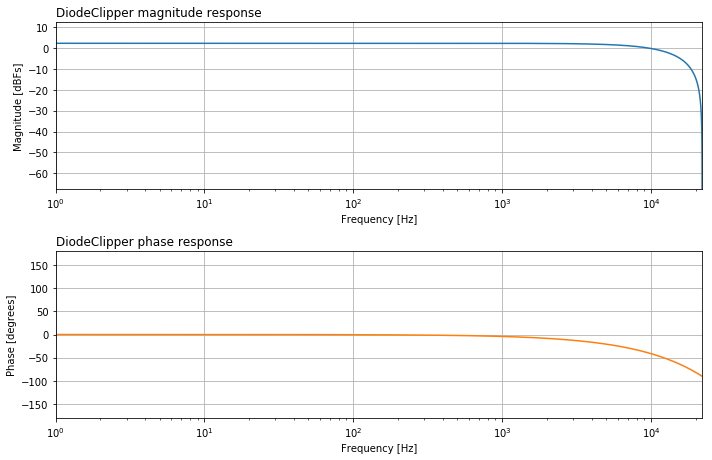

In [62]:
dc = DiodeClipper(44100, cutoff=500, input_gain_db=5)
dc.plot_freqz()

**Processing a signal with the WDF Diode Clipper**

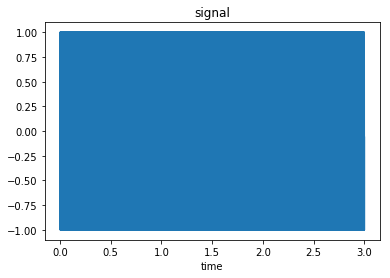

In [63]:
SR = 44100
t = np.arange(0,3,1/SR)
freq = 440
A = 1
signal = A * np.sin(2*np.pi * freq * t)

plt.plot(t, signal)
plt.title('signal')
plt.xlabel('time')
plt.show()

IPython.display.display(IPython.display.Audio(data=signal, rate=SR))

In [64]:
signal = np.array(signal)
processed_signal = dc.process_signal(signal)

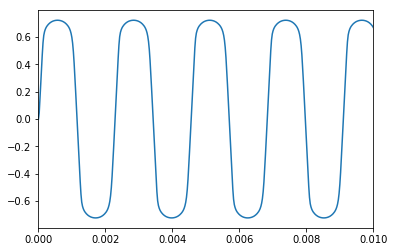

In [65]:
plt.plot(t, processed_signal)
plt.xlim(0,0.01)
plt.show()
IPython.display.display(IPython.display.Audio(data=processed_signal, rate=SR))

Let's change the input gain and process the signal again to distort it more

In [66]:
dc.set_input_gain(50.0)
processed_signal = dc.process_signal(signal)

In [67]:
IPython.display.display(IPython.display.Audio(data=processed_signal, rate=SR))

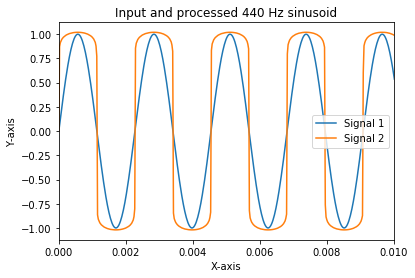

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.plot(t, signal, label='Signal 1')
plt.plot(t, processed_signal, label='Signal 2')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input and processed 440 Hz sinusoid')

# Add a legend
plt.legend()
plt.xlim(0,0.01)

# Show the plot
plt.show()


Let's process a more complex signal

In [69]:
IPython.display.Audio("guitar_riff.wav")

In [70]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read

sr, complex_signal = read("guitar_riff.wav")
complex_signal = np.array(complex_signal)

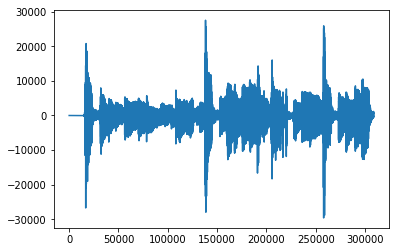

In [71]:
plt.plot(complex_signal)
plt.show()

In [72]:
dc.set_input_gain(1.0)
processed_signal = dc.process_wav("guitar_riff.wav")

In [73]:
IPython.display.display(IPython.display.Audio(data=processed_signal, rate=SR))

C:\Users\Pau\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7674: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


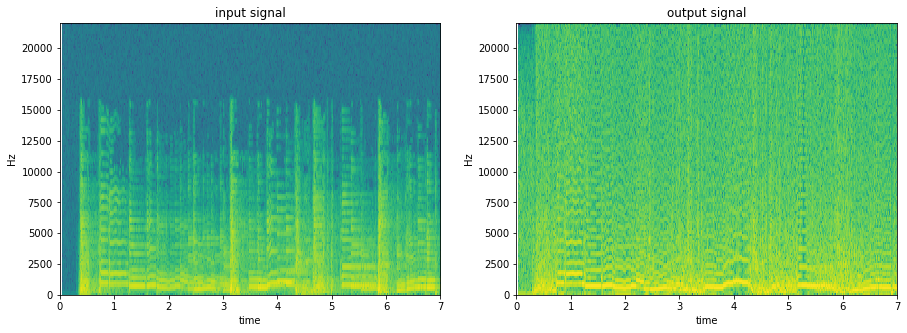

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#fig.suptitle('Horizontally stacked subplots')
ax1.specgram(complex_signal, Fs=sampling_rate)
ax1.set_title('input signal')
ax2.set_title('output signal')
ax1.set_xlabel('time')
ax1.set_ylabel('Hz')
ax2.set_xlabel('time')
ax2.set_ylabel('Hz')
ax2.specgram(processed_signal, Fs=sampling_rate)

    
plt.show()